# 题目一——判断文本是否有制定主题倾向

In [21]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
DATA_DIR_PATH = 'D:/NLP-master/data'
train_files = ['T','F']

# 数据处理
## 正样本

In [22]:
#加载正样本
true_data = pd.read_csv(os.path.join(DATA_DIR_PATH, train_files[0]+".csv"), encoding = "gb18030")
true_data

,关键词,用户名,用户id,内容,发博时间,转发数,评论数,点赞数,url
0,美国实体清单,大项的天,1758961192,突发：美国商务部工业和安全局声明指，把华为及70个附属公司增列入出口管制的所谓实体清单。此举...,2019/5/16 6:43,479,314,105,https://weibo.com/1758961192/Hup7XdaVc?refer_f...
1,美国实体清单,洪水中的小蚂蚁,1511423691,川普将签署行政令，禁止美国企业使用对国家安全构成风险的企业所生产的电信设备，为禁止美企与华为...,2019/5/16 7:56,0,0,1,https://weibo.com/1511423691/HupBHmYqV?refer_f...
2,美国实体清单,秋月仰望,1114067051,昨天的消息美国商务部工业和安全局声明指，把华为及70个附属公司增列入出口管制的所谓实体清单。...,2019/5/16 7:54,0,0,4,https://weibo.com/1114067051/HupAMlUKw?refer_f...
3,美国实体清单,XConstructor,2208067002,BREAKINGNEWS：美国商务部工业和安全局声明指，把华为及70个附属公司增列入出口管制...,2019/5/16 7:52,0,0,0,https://weibo.com/2208067002/HupAdsaTY?refer_f...
4,美国实体清单,韭菜独立连,2168643433,突发：美国商务部工业和安全局声明指，把华为及70个附属公司增列入出口管制的所谓实体清单。此举...,2019/5/16 7:49,0,0,7,https://weibo.com/2168643433/HupyV67ZL?refer_f...
...,...,...,...,...,...,...,...,...,...
5585,美国实体清单,财旺波段王,5231992959,#免费公益股#杰瑞股份sz002353页岩气、可燃冰、天然气、海工装备、化工机械等概念，被美...,2019/12/29 21:08,0,0,0,https://weibo.com/5231992959/In3loCHdu?refer_f...
5586,美国实体清单,财旺投资,3198345522,#免费公益股#杰瑞股份sz002353页岩气、可燃冰、天然气、海工装备、化工机械等概念，被美...,2019/12/29 21:08,0,0,0,https://weibo.com/3198345522/In3loCHar?refer_f...
5587,美国实体清单,路飞科技说,1162629521,任总2019年采访回顾总结，美国媒体采访比例最高，热点话题中美国政府、实体清单和后门谈论最多...,2019/12/29 23:28,0,0,0,https://weibo.com/1162629521/In4gbqFDA?refer_f...
5588,美国实体清单,参考消息,2375086267,【境外媒体：华为无惧美国打压逆势前行】境外媒体称，华为公司正越来越多地投身国内市场以弥补国际...,2019/12/30 19:38,22,15,152,https://weibo.com/2375086267/Incbks9NJ?refer_f...


### 探究统计规律

In [23]:
#数据集的统计规律
print('2019年5至12月含"美国实体清单"的原创微博条数:')
for n in range(5,13):
    String = '2019/'+str(n)+'/'
    a = 0
    for i in true_data['发博时间']:
        if String in i:
            a=a+1
    print(str(n)+'月：'+str(a)+'条')

2019年5至12月含"美国实体清单"的原创微博条数:
5月：890条
6月：815条
7月：795条
8月：1101条
9月：203条
10月：1008条
11月：343条
12月：435条


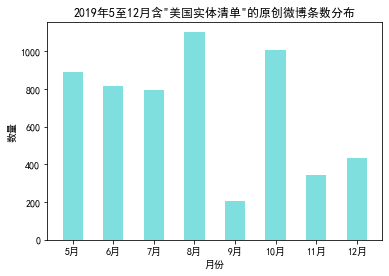

In [24]:
#绘制直方图
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# 这两行代码解决 plt 中文显示的问题
mpl.rcParams["font.sans-serif"] = ["SimHei"]
mpl.rcParams["axes.unicode_minus"] = False

x = np.arange(8)
y = np.array([890,815,795,1101,203,1008,343,435])

bar_width = 0.5
tick_label = ["5月","6月","7月","8月","9月","10月","11月","12月"]

plt.bar(x, y, bar_width, align="center", color="c", alpha=0.5)

plt.xticks(x, tick_label)
# 添加x轴和y轴标签
plt.xlabel('月份')
plt.ylabel('数量')
# 添加标题
plt.title('2019年5至12月含"美国实体清单"的原创微博条数分布')
plt.show()

In [25]:
#取所需列，只需要“内容”一列
t_data = true_data[['内容']]
t_data

,内容
0,突发：美国商务部工业和安全局声明指，把华为及70个附属公司增列入出口管制的所谓实体清单。此举...
1,川普将签署行政令，禁止美国企业使用对国家安全构成风险的企业所生产的电信设备，为禁止美企与华为...
2,昨天的消息美国商务部工业和安全局声明指，把华为及70个附属公司增列入出口管制的所谓实体清单。...
3,BREAKINGNEWS：美国商务部工业和安全局声明指，把华为及70个附属公司增列入出口管制...
4,突发：美国商务部工业和安全局声明指，把华为及70个附属公司增列入出口管制的所谓实体清单。此举...
...,...
5585,#免费公益股#杰瑞股份sz002353页岩气、可燃冰、天然气、海工装备、化工机械等概念，被美...
5586,#免费公益股#杰瑞股份sz002353页岩气、可燃冰、天然气、海工装备、化工机械等概念，被美...
5587,任总2019年采访回顾总结，美国媒体采访比例最高，热点话题中美国政府、实体清单和后门谈论最多...
5588,【境外媒体：华为无惧美国打压逆势前行】境外媒体称，华为公司正越来越多地投身国内市场以弥补国际...


### 让文本只保留汉字，去掉所有符号，包括空格、数字、标点、字母等等

In [26]:
content = true_data['内容'].tolist()
#去掉文本中的空格
def process(our_data):
    m1 =map(lambda s: s.replace(' ',''), our_data)
    return list(m1)

#让文本只保留汉字，去掉所有符号，包括数字、标点、字母等等
def is_chinese(uchar):
    if uchar >=u'\u4e00' and uchar <= u'\u9fa5':
        return True
    else:
        return False

def format_str(content):
    content_str = ''
    for i in content:
        if is_chinese(i):
            content_str = content_str + i
    return content_str

content_de = process(content)#去除空格
chinese_list = []
for line in content_de:#只保留汉字
    chinese_list.append(format_str(line))
# print(chinese_list)
print('正样本数量：',len(chinese_list))

正样本数量： 5590


### 删除样本中重复项

In [27]:
#删除重复项
chinese_de_list=sorted(set(chinese_list),key=chinese_list.index) #转集合再转列表，顺序输出
# print(chinese_list1)
print('删除重复项后正样本数量：',len(chinese_de_list))

删除重复项后正样本数量： 4212


### 保存为txt文件

In [28]:
#保存成txt
def text_save(filename, data):#filename为写入txt文件的路径，data为要写入数据列表.
    file = open(filename,'a', encoding='utf-8')
    for i in range(len(data)):
        s = str(data[i]).replace('[','').replace(']','')#去除[],这两行按数据不同，可以选择
        s = s.replace("'",'').replace(',','') +'\n'   #去除单引号，逗号，每行末尾追加换行符
        file.write(s)
    file.close()
    print("保存文件成功") 
text_save('D:/NLP-master/data/美国实体清单'+str(len(chinese_de_list))+'.txt', chinese_de_list)

保存文件成功


## 负样本
### 处理方法相同

In [29]:
#加载负样本
false_data = pd.read_csv(os.path.join(DATA_DIR_PATH, train_files[1]+".csv"), encoding = "gb18030")
content1 = false_data['内容'].tolist()
#去除空格
content_de1 = process(content1)
chinese_list1 = []
#只保留汉字
for line in content_de1:
    chinese_list1.append(format_str(line))
print('负样本数量：',len(chinese_list1))
#删除重复项
chinese_de_list1=sorted(set(chinese_list1),key=chinese_list1.index) #转集合再转列表，顺序输出
print('删除重复项后负样本数量：',len(chinese_de_list1))
#保存成txt 
text_save('D:/NLP-master/data/其他'+str(len(chinese_de_list1))+'.txt', chinese_de_list1)

负样本数量： 4300
删除重复项后负样本数量： 4248
保存文件成功
